In [1]:
library(data.table)
library(xts)
install.packages("tseries")
library(tseries)
install.packages("rugarch")
library(rugarch)
#Load data
#USD/EUR data


Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last

Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tseries' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tseries'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bbalamdari\OneDrive - Ecolab\Documents\R\win-library\3.6\00LOCK\tseries\libs\x64\tseries.dll to C:\Users\bbalamdari\OneDrive - Ecolab\Documents\R\win-library\3.6\tseries\libs\x64\tseries.dll: Permission denied"Warning message:
"restored 'tseries'"


The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\RtmpQNRSi8\downloaded_packages


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rugarch' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rugarch'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bbalamdari\OneDrive - Ecolab\Documents\R\win-library\3.6\00LOCK\rugarch\libs\x64\rugarch.dll to C:\Users\bbalamdari\OneDrive - Ecolab\Documents\R\win-library\3.6\rugarch\libs\x64\rugarch.dll: Permission denied"Warning message:
"restored 'rugarch'"


The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\RtmpQNRSi8\downloaded_packages


Warning message:
"package 'rugarch' was built under R version 3.6.3"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



In [2]:
data=read.csv("exchange_rate_USD_EUR_daily.csv",header=TRUE)

head(data, n=5)
tail(data, n=10)

,Date,Rate
,<fct>,<dbl>
1,1/4/1999,0.842695
2,1/5/1999,0.850335
3,1/6/1999,0.859952
4,1/7/1999,0.856112
5,1/8/1999,0.865177


,Date,Rate
,<fct>,<dbl>
6316,8/16/2017,0.855055
6317,8/17/2017,0.851265
6318,8/18/2017,0.851125
6319,8/19/2017,0.850310
6320,8/20/2017,0.850230
6321,8/21/2017,0.845835
6322,8/23/2017,0.847325
6323,8/24/2017,0.846860
6324,8/25/2017,0.841585


In [3]:
names(data)[names(data) == "Rate"] <- "rate"
head(data, n=5)
data=ts(data[,2], start=c(1999,4), freq=365.24)

,Date,rate
,<fct>,<dbl>
1,1/4/1999,0.842695
2,1/5/1999,0.850335
3,1/6/1999,0.859952
4,1/7/1999,0.856112
5,1/8/1999,0.865177


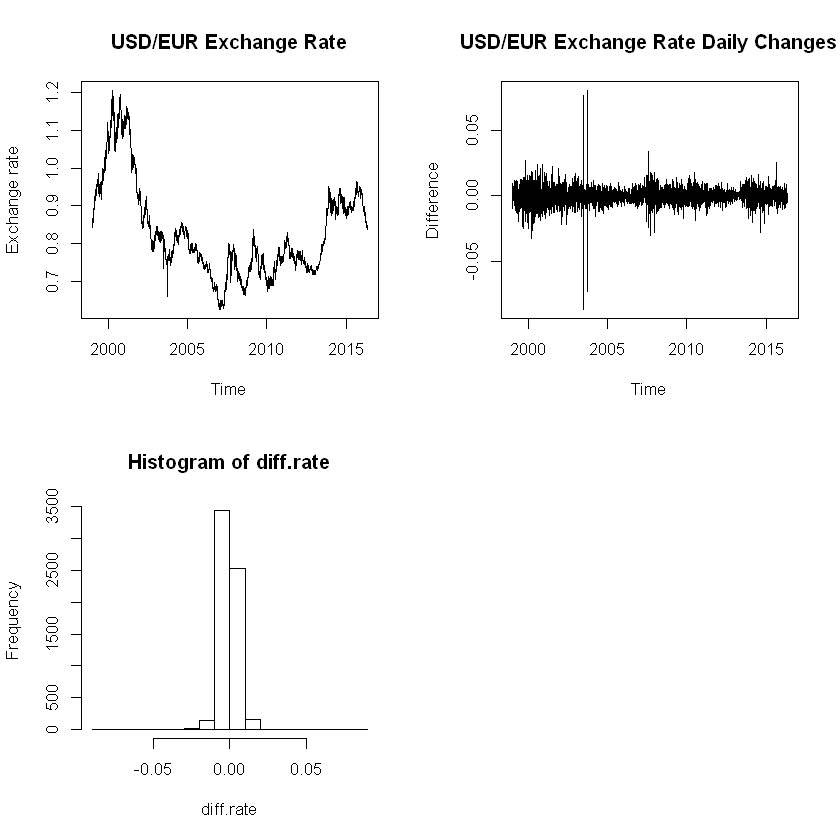

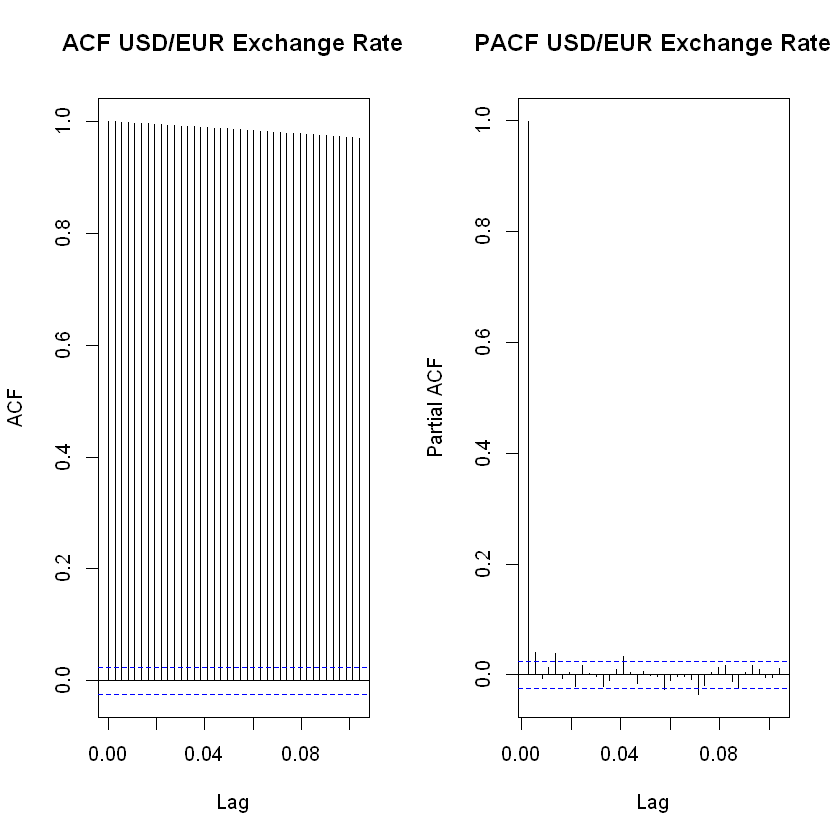

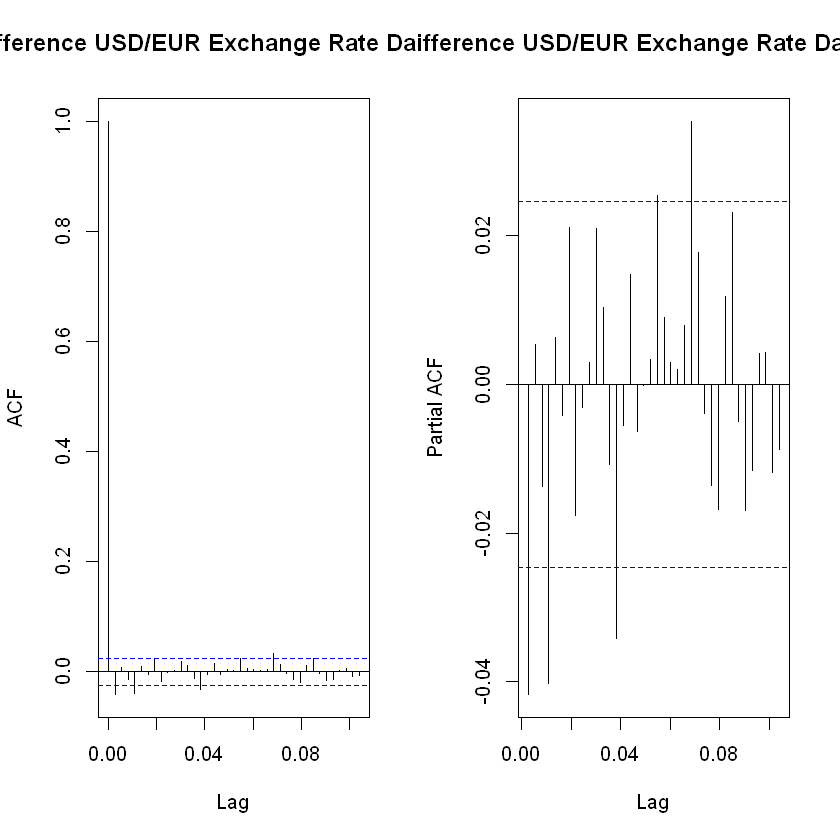

In [11]:
par(mfrow=c(2,2))
#Exploratory analysis
#Plot original exchange rates
plot(data,type='l',main='USD/EUR Exchange Rate',ylab="Exchange rate")

#Differencing the series
diff.rate=diff(data)
diff.rate = diff.rate[!is.na(diff.rate)]
diff.rate=ts(diff.rate, start=c(1999,5), freq=365.24)
#Plot differenced series
ts.plot(diff.rate,type='l',main='USD/EUR Exchange Rate Daily Changes',ylab="Difference")
hist(diff.rate)

#ACF & PACF plots on original series
par(mfcol=c(1,2))
acf(data,main='ACF USD/EUR Exchange Rate')
pacf(data,main='PACF USD/EUR Exchange Rate')

#ACF & PACF plots on differenced series
par(mfcol=c(1,2))
acf(diff.rate,main='ACF Difference USD/EUR Exchange Rate Daily Changes')
pacf(diff.rate,main='PACF Difference USD/EUR Exchange Rate Daily Changes')

In [12]:
## Order selection -- AIC

test_modelA <- function(p,d,q){
 mod = arima(diff.rate, order=c(p,d,q), method="ML")
 current.aic = AIC(mod)
 df = data.frame(p,d,q,current.aic)
 names(df) <- c("p","d","q","AIC")
 print(paste(p,d,q,current.aic,sep=" "))
    
 return(df)
 }
 
 orders = data.frame(Inf,Inf,Inf,Inf)
 names(orders) <- c("p","d","q","AIC")
 
 
 for (p in 0:6){
   for (d in 0:1){
     for (q in 0:3) {
       possibleError <- tryCatch(
         orders<-rbind(orders,test_modelA(p,d,q)),
         error=function(e) e
       )
       if(inherits(possibleError, "error")) next
 
     }
   }
 }
 orders <- orders[order(-orders$AIC),]
 tail(orders)


[1] "0 0 0 -48643.3023298416"
[1] "0 0 1 -48652.2051543726"
[1] "0 0 2 -48650.4315092656"
[1] "0 0 3 -48650.4073716963"
[1] "0 1 0 -43996.5263336942"
[1] "0 1 1 -48625.8578150923"
[1] "0 1 2 -48634.6740657549"
[1] "0 1 3 -48632.9124775997"
[1] "1 0 0 -48652.3273687509"
[1] "1 0 1 -48650.2680000177"
[1] "1 0 2 -48648.4599173128"
[1] "1 0 3 -48651.8549595746"
[1] "1 1 0 -46020.4440601772"
[1] "1 1 1 -48634.7994833853"
[1] "1 1 2 -48632.9075458068"
[1] "1 1 3 -48630.8964576728"
[1] "2 0 0 -48650.5106979108"
[1] "2 0 1 -48648.490672258"
[1] "2 0 2 -48647.6053285125"
[1] "2 0 3 -48674.9538214349"
[1] "2 1 0 -46751.2817381983"
[1] "2 1 1 -48632.9937173489"
[1] "2 1 2 -48630.93357494"
[1] "2 1 3 -48629.312593605"
[1] "3 0 0 -48649.7081055663"
[1] "3 0 1 -48651.4549183778"
[1] "3 0 2 -48674.2616830644"
[1] "3 0 3 -48648.9180683144"
[1] "3 1 0 -47090.3720421235"
[1] "3 1 1 -48632.1637789884"
[1] "3 1 2 -48629.014026038"
[1] "3 1 3 -48627.4930481984"
[1] "4 0 0 -48657.9760866247"
[1] "4 0 1 -486

Warning message in log(s2):
"NaNs produced"

[1] "4 1 2 -48638.9535202327"
[1] "4 1 3 -48638.0362581365"
[1] "5 0 0 -48656.2318397554"
[1] "5 0 1 -48654.2255610137"
[1] "5 0 2 -48652.219798447"
[1] "5 0 3 -48652.8344689978"
[1] "5 1 0 -47607.6771082017"
[1] "5 1 1 -48638.6198663105"
[1] "5 1 2 -48637.0352355483"
[1] "5 1 3 -48636.3271589299"
[1] "6 0 0 -48654.340541217"
[1] "6 0 1 -48652.3192451662"
[1] "6 0 2 -48650.3144714906"
[1] "6 0 3 -48673.6063142139"
[1] "6 1 0 -47790.4842035755"
[1] "6 1 1 -48636.7204202349"
[1] "6 1 2 -48635.6162247883"
[1] "6 1 3 -48633.4335636531"


,p,d,q,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
42,5,0,0,-48656.23
34,4,0,0,-48657.98
53,6,0,3,-48673.61
28,3,0,2,-48674.26
37,4,0,3,-48674.44
21,2,0,3,-48674.95


In [13]:
final.arima=arima(diff.rate, order=c(6,0,3))


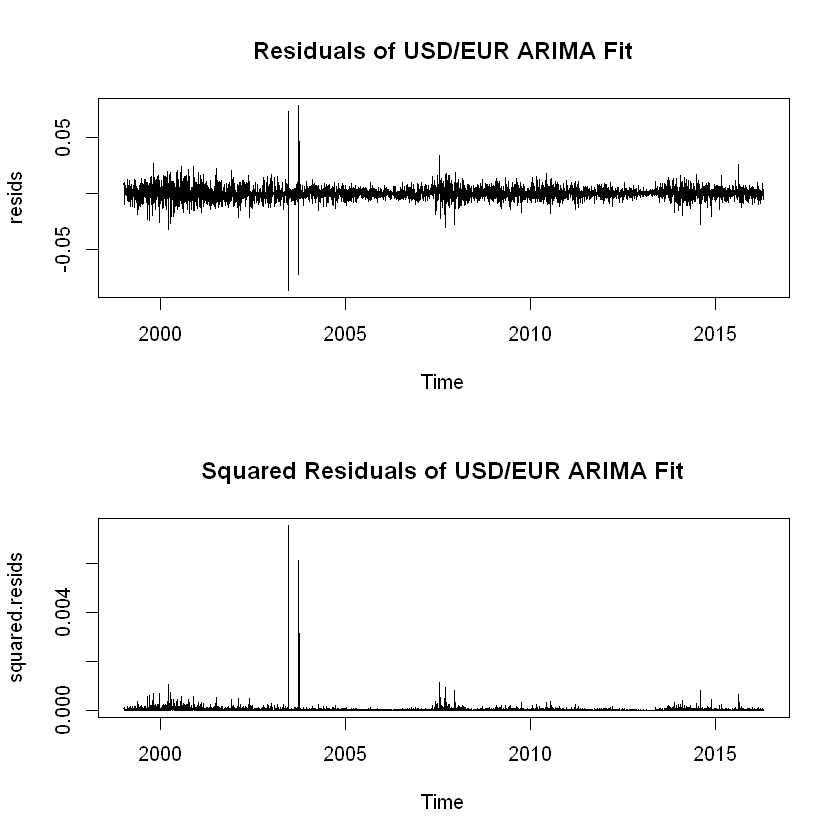


	Box-Ljung test

data:  resids
X-squared = 1.373, df = 1, p-value = 0.2413



	Box-Ljung test

data:  (resids)^2
X-squared = 645.71, df = 1, p-value < 2.2e-16


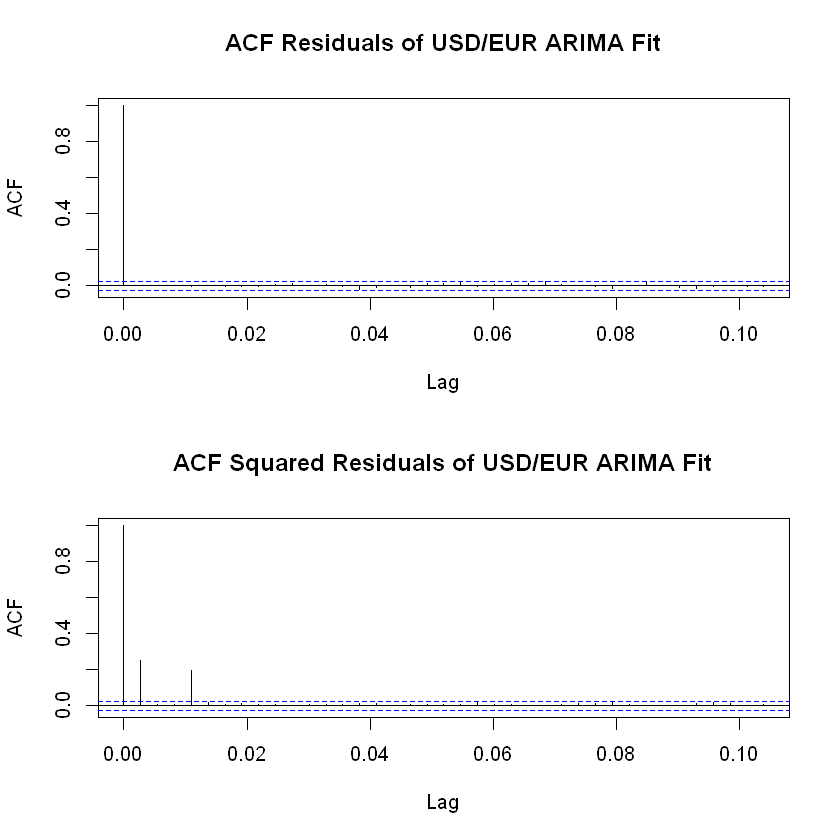

In [14]:
#Residual Analysis
resids = resid(final.arima)
squared.resids=resids^2

par(mfcol=c(2,1))
plot(resids,main='Residuals of USD/EUR ARIMA Fit')
plot(squared.resids,main='Squared Residuals of USD/EUR ARIMA Fit')

par(mfcol=c(2,1))
acf(resids,main='ACF Residuals of USD/EUR ARIMA Fit')
acf(squared.resids,main='ACF Squared Residuals of USD/EUR ARIMA Fit')


#test for serial correlation
Box.test(resids,lag=10,type='Ljung',fitdf=9)
#test for arch effect
Box.test((resids)^2,lag=10,type='Ljung',fitdf=9)


Call:
garch(x = resids, order = c(0, 8), trace = F)

Model:
GARCH(0,8)

Residuals:
       Min         1Q     Median         3Q        Max 
-19.539408  -0.409037  -0.002846   0.393720   6.243732 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 8.503e-06   2.282e-07   37.264  < 2e-16 ***
a1 4.764e-02   5.837e-03    8.163 2.22e-16 ***
a2 1.919e-02   5.795e-03    3.312 0.000926 ***
a3 2.998e-02   5.170e-03    5.798 6.71e-09 ***
a4 4.089e-02   2.801e-03   14.599  < 2e-16 ***
a5 1.607e-01   4.053e-03   39.654  < 2e-16 ***
a6 9.908e-02   9.136e-03   10.845  < 2e-16 ***
a7 2.984e-01   7.278e-03   41.005  < 2e-16 ***
a8 1.322e-01   1.130e-02   11.699  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 274589, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 2.4379, df = 1, p-value = 0.1184


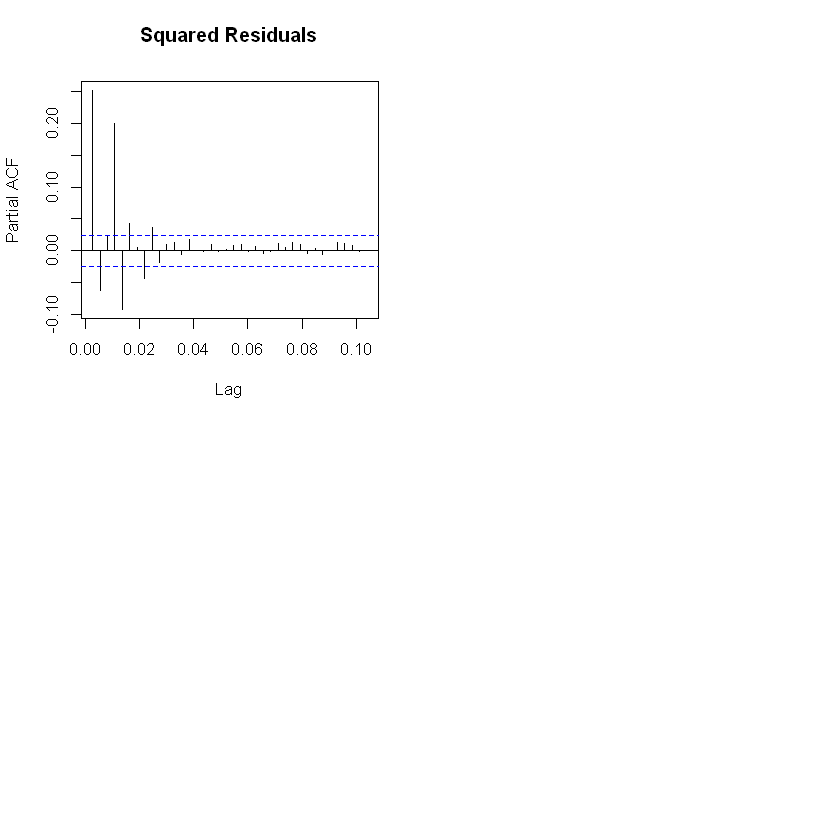

In [16]:
#ARCH Fit
par(mfrow=c(2,2))
# What order?
pacf(resids^2, ,main="Squared Residuals")

#from tseries
garch.fit = garch(resids, order = c(0,8),trace=F)

summary(garch.fit)




	Box-Ljung test

data:  resids.fgarch
X-squared = 10.643, df = 1, p-value = 0.001105



	Box-Ljung test

data:  resids.fgarch^2
X-squared = 6.1521, df = 1, p-value = 0.01313


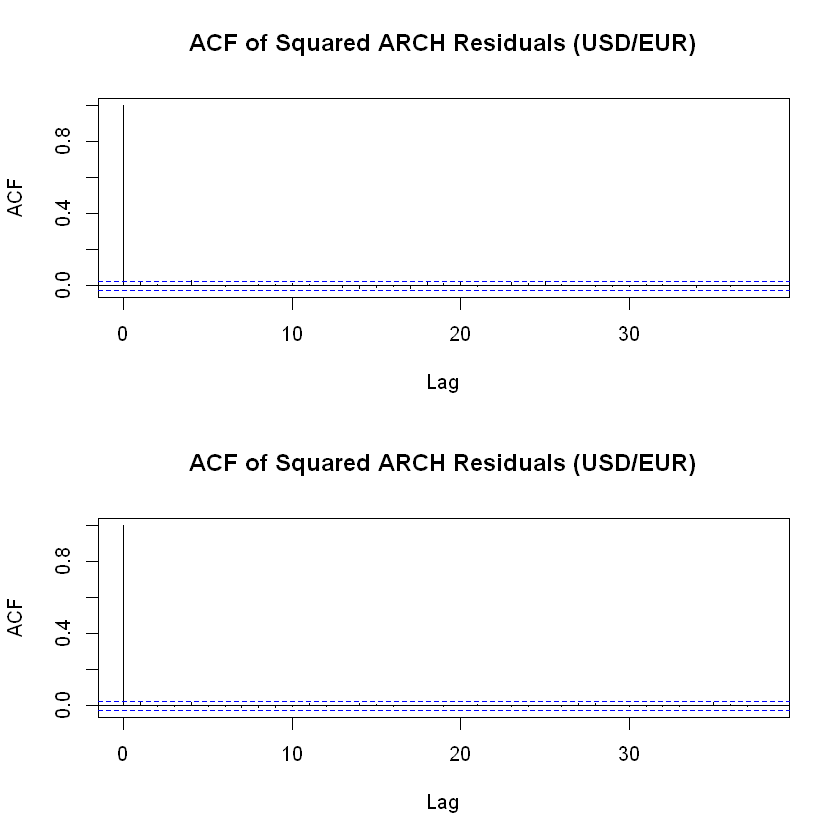

In [22]:
#Evaluate goodness of fit
resids.fgarch = residuals(garch.fit)[-(1:8)]
par(mfcol=c(2,1))
acf(resids.fgarch,main="ACF of Squared ARCH Residuals (USD/EUR)")
acf(resids.fgarch^2,main="ACF of Squared ARCH Residuals (USD/EUR)")
Box.test(resids.fgarch,lag=9,type='Ljung',fitdf=8)
Box.test(resids.fgarch^2,lag=9,type='Ljung',fitdf=8)


In [23]:
#GARCH Model
#Divide data into training and testing
#Predict July and August
length(diff.rate)
data.test=diff.rate[(6272:length(diff.rate))]
data.train=diff.rate[-c(6272:length(diff.rate))]

[1] 6324

In [24]:
#Initial GARCH Order
#ARIMA-GARCH GARCH order
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(6,3), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.train, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:2){
  for (n in 0:2){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)



[1] "0 0 -8.06123032656953"
[1] "0 1 -8.05218954842176"
[1] "0 2 717.099994826641"
[1] "1 0 -8.08286361990716"
[1] "1 1 -8.14500931121593"
[1] "1 2 -8.14621705185512"
[1] "2 0 -8.07967090560403"
[1] "2 1 -8.14361050708129"
[1] "2 2 -8.14475924150061"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
8,2,0,-8.079671
5,1,0,-8.082864
9,2,1,-8.143611
10,2,2,-8.144759
6,1,1,-8.145009
7,1,2,-8.146217


In [25]:
#ARMA update
#ARIMA-GARCH ARIMA order
test_modelAGA <- function(p,q){
  spec = ugarchspec(variance.model=list(garchOrder=c(1,2)),
                    mean.model=list(armaOrder=c(p,q), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.train, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(p,q,current.bic)
  names(df) <- c("p","q","BIC")
  print(paste(p,q,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("p","q","BIC")


for (p in 0:2){
  for (q in 0:2){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGA(p,q)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)

#[1] 0 0

[1] "0 0 -8.15594491394701"
[1] "0 1 -8.15548804566102"
[1] "0 2 -8.15416578536148"
[1] "1 0 -8.15555481543749"
[1] "1 1 -8.15418654705561"
[1] "1 2 -8.15274086205067"
[1] "2 0 -8.15418747551815"
[1] "2 1 -8.15282983237886"
[1] "2 2 -8.15160295741267"


,p,q,BIC
,<dbl>,<dbl>,<dbl>
4,0,2,-8.154166
6,1,1,-8.154187
8,2,0,-8.154187
3,0,1,-8.155488
5,1,0,-8.155555
2,0,0,-8.155945


In [26]:
#GARCH update
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(0,0), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, data.train, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:2){
  for (n in 0:2){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)
#[1] 1 2

[1] "0 0 -8.07190173121561"
[1] "0 1 -8.06192479068802"
[1] "0 2 -8.06465411657727"
[1] "1 0 -8.09314843556384"
[1] "1 1 -8.15475682360052"
[1] "1 2 -8.15594678171895"
[1] "2 0 -8.09160170934307"
[1] "2 1 -8.1533254638182"
[1] "2 2 -8.15455070196722"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
8,2,0,-8.091602
5,1,0,-8.093148
9,2,1,-8.153325
10,2,2,-8.154551
6,1,1,-8.154757
7,1,2,-8.155947


In [27]:
#Goodness of Fit 
spec.1 = ugarchspec(variance.model=list(garchOrder=c(1,2)),
mean.model=list(armaOrder=c(6,3), 
include.mean=T), distribution.model="std")    
final.model.1 = ugarchfit(spec.1, data.train, solver = 'hybrid')

spec.2 = ugarchspec(variance.model=list(garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0), 
include.mean=T), distribution.model="std")    
final.model.2 = ugarchfit(spec.2, data.train, solver = 'hybrid')


#Compare Information Criteria
infocriteria(final.model.1)
infocriteria(final.model.2)

,
Akaike,-8.162349
Bayes,-8.146218
Shibata,-8.162361
Hannan-Quinn,-8.156760


,
Akaike,-8.162397
Bayes,-8.155945
Shibata,-8.162399
Hannan-Quinn,-8.160162


In [40]:
final.model.1 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,2)
Mean Model	: ARFIMA(6,0,3)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu     -0.000018    0.000035   -0.49548 0.620260
ar1    -0.442167    0.048659   -9.08706 0.000000
ar2    -0.560169    0.026941  -20.79278 0.000000
ar3    -0.868225    0.011433  -75.94259 0.000000
ar4    -0.037600    0.012200   -3.08188 0.002057
ar5    -0.009823    0.011178   -0.87877 0.379524
ar6    -0.013643    0.009887   -1.37993 0.167610
ma1     0.415141    0.047742    8.69544 0.000000
ma2     0.552405    0.026158   21.11814 0.000000
ma3     0.845522    0.001991  424.77091 0.000000
omega   0.000000    0.000000    0.40072 0.688627
alpha1  0.044582    0.003532   12.62357 0.000000
beta1   0.101155    0.000689  146.90630 0.000000
beta2 


	Box-Ljung test

data:  resids.final.model
X-squared = 10.918, df = 1, p-value = 0.0009524



	Box-Ljung test

data:  resids.final.model^2
X-squared = 397.78, df = 1, p-value < 2.2e-16


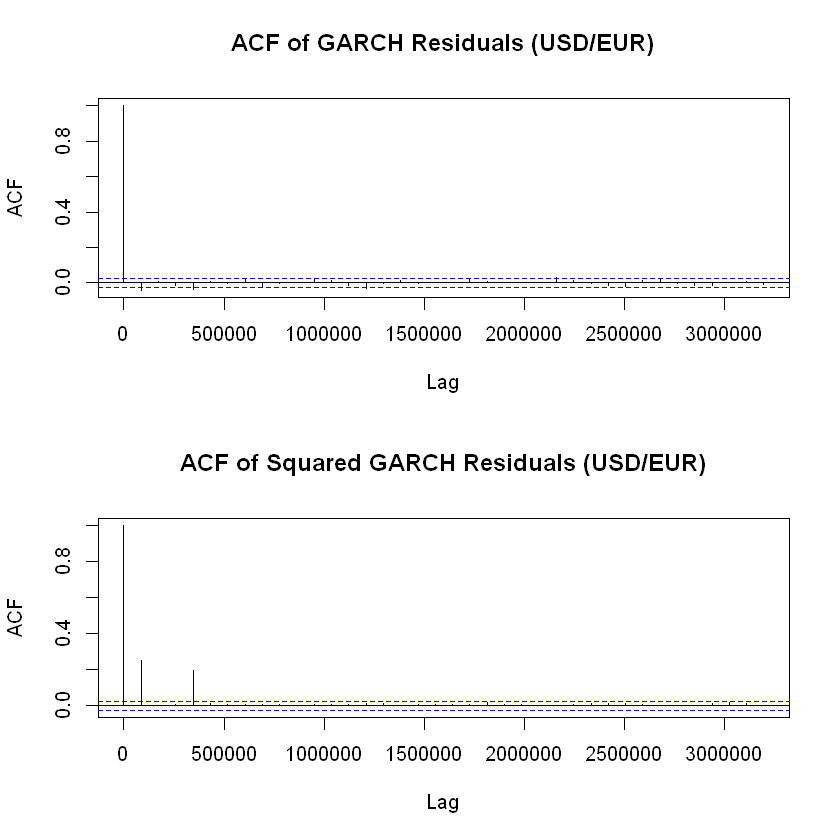

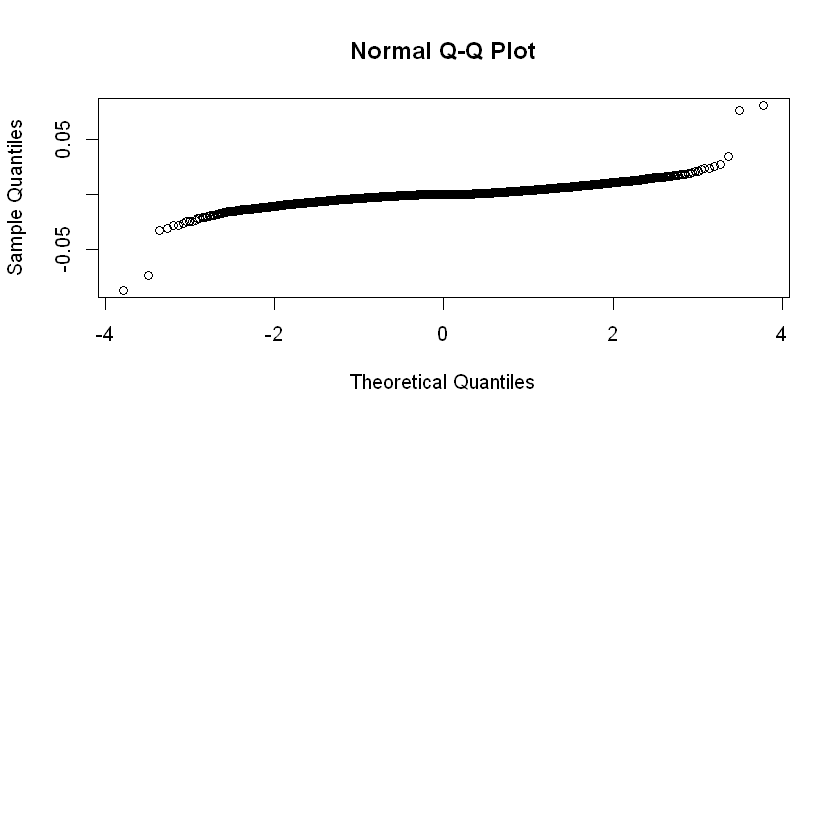

In [33]:
#Residual Analysis 
resids.final.model = residuals(final.model.2)
par(mfcol=c(2,1))
acf(resids.final.model,main="ACF of GARCH Residuals (USD/EUR)")
acf(resids.final.model^2,main="ACF of Squared GARCH Residuals (USD/EUR)")                    
Box.test(resids.final.model,lag=1,fitdf=0,type='Ljung')
Box.test(resids.final.model^2,lag=1,fitdf=0,type='Ljung')
qqnorm(resids.final.model)

In [34]:
nfore = length(data.test)
nfore

[1] 53

In [42]:
#Prediction of the return time series and the volatility sigma
nfore = length(data.test)
fore.series.1 = NULL
fore.sigma.1 = NULL
fore.series.2 = NULL
fore.sigma.2 = NULL
for(f in 1: nfore)
{
#Fit models
data = data.train
if(f>2)
data = c(data.train,data.test[1:(f-1)])  
final.model.1 = ugarchfit(spec.1, data, solver = 'hybrid')    
final.model.2 = ugarchfit(spec.2, data, solver = 'hybrid')
#Forecast
fore = ugarchforecast(final.model.1, n.ahead=1)
fore.series.1 = c(fore.series.1, fore@forecast$seriesFor)
fore.sigma.1 = c(fore.sigma.1, fore@forecast$sigmaFor)
fore = ugarchforecast(final.model.2, n.ahead=1)
fore.series.2 = c(fore.series.2, fore@forecast$seriesFor)
fore.sigma.2 = c(fore.sigma.2, fore@forecast$sigmaFor)

}
fore.series.1[is.nan(fore.series.1)]=0

Warning message in .makefitmodel(garchmodel = "sGARCH", f = .sgarchLLH, T = T, m = m, :
"
rugarch-->warning: failed to invert hessian
"

In [50]:
#Compute Accuracy Measures 
#Mean Squared Prediction Error (MSPE)
mean((fore.series.1 - data.test)^2)
mean((fore.series.2 - data.test)^2)
#Mean Absolute Prediction Error (MAE)
mean(abs(fore.series.1 - data.test))
mean(abs(fore.series.2 - data.test))
#Mean Absolute Percentage Error (MAPE)
mean(abs(fore.series.1 - data.test)/(data.test+0.000001))
mean(abs(fore.series.2 - data.test)/(data.test+0.000001))
#Precision Measure (PM)
sum((fore.series.1 - data.test)^2)/sum((data.test-mean(data.test))^2)
sum((fore.series.2 - data.test)^2)/sum((data.test-mean(data.test))^2)

[1] 9.864132e-06

[1] 9.764181e-06

[1] 0.002229606

[1] 0.00219315

[1] 11.57837

[1] 2.728444

[1] 1.059521

[1] 1.048785

In [51]:
data.test
data.plot

[1] -0.001270  0.000000  0.005530  0.000685  0.000665 -0.005880  0.000455
 [8]  0.000540 -0.000005  0.000440 -0.003590  0.001975  0.002165 -0.005040
[15] -0.001160  0.000000 -0.000290 -0.006675  0.003215 -0.008603 -0.002587
[22]  0.000595  0.000000  0.001785 -0.001210  0.001960 -0.003005 -0.005550
[29] -0.000760  0.000000 -0.003955  0.000430 -0.004570 -0.000145  0.008475
[36] -0.001595 -0.000090 -0.001115 -0.002050 -0.000065  0.000000  0.001935
[43]  0.004150  0.002910 -0.003790 -0.000140 -0.000815 -0.000080 -0.004395
[50]  0.001490 -0.000465 -0.005275 -0.002815

$Fore
 [1] -2.935630e-05 -2.935024e-05 -3.409142e-05 -3.193054e-05 -2.734182e-05
 [6] -2.865361e-05 -2.962089e-05 -2.915035e-05 -3.488515e-05 -2.789043e-05
[11] -2.890783e-05 -3.289357e-05 -2.745146e-05 -2.847135e-05 -3.124908e-05
[16] -3.626022e-05 -3.447975e-05 -3.508425e-05 -2.700836e-05 -2.940839e-05
[21] -2.360205e-05 -3.040578e-05 -3.022559e-05 -2.512998e-05 -2.971887e-05
[26] -3.013282e-05 -2.906248e-05 -2.955953e-05 -3.105716e-05 -2.897613e-05
[31] -2.591429e-05 -2.807738e-05 -3.256623e-05 -6.944656e-07 -3.092455e-06
[36] -2.978966e-05 -3.212409e-05 -3.223219e-05 -3.260905e-05 -3.323825e-05
[41] -3.586529e-05 -3.341431e-05 -3.281433e-05 -3.196513e-05 -3.125933e-05
[46] -3.117049e-05 -3.901450e-05 -2.830895e-05 -3.214868e-05 -3.345910e-05
[51] -2.942430e-05 -3.291324e-05 -1.748911e-05

$<NA>
[1] 0

$<NA>
[1] 0.00553

$<NA>
[1] 0.000685

$<NA>
[1] 0.000665

$<NA>
[1] -0.00588

$<NA>
[1] 0.000455

$<NA>
[1] 0.00054

$<NA>
[1] -5e-06

$<NA>
[1] 0.00044

$<NA>
[1] -0.00359

$<NA>
[1] 0.001975

$<NA>
[1] 0.002165

$<NA>
[1] -0.00504

$<NA>
[1] -0.00116

$<NA>
[1] 0

$<NA>
[1] -0.00029

$<NA>
[1] -0.006675

$<NA>
[1] 0.003215

$<NA>
[1] -0.008603

$<NA>
[1] -0.002587

$<NA>
[1] 0.000595

$<NA>
[1] 0

$<NA>
[1] 0.001785

$<NA>
[1] -0.00121

$<NA>
[1] 0.00196

$<NA>
[1] -0.003005

$<NA>
[1] -0.00555

$<NA>
[1] -0.00076

$<NA>
[1] 0

$<NA>
[1] -0.003955

$<NA>
[1] 0.00043

$<NA>
[1] -0.00457

$<NA>
[1] -0.000145

$<NA>
[1] 0.008475

$<NA>
[1] -0.001595

$<NA>
[1] -9e-05

$<NA>
[1] -0.001115

$<NA>
[1] -0.00205

$<NA>
[1] -6.5e-05

$<NA>
[1] 0

$<NA>
[1] 0.001935

$<NA>
[1] 0.00415

$<NA>
[1] 0.00291

$<NA>
[1] -0.00379

$<NA>
[1] -0.00014

$<NA>
[1] -0.000815

$<NA>
[1] -8e-05

$<NA>
[1] -0.004395

$<NA>
[1] 0.00149

$<NA>
[1] -0.000465

$<NA>
[1] -0.005275

$<NA>
[1] -0.002815

Warning message in data.plot$Fore = fore.series.1:
"Coercing LHS to a list"

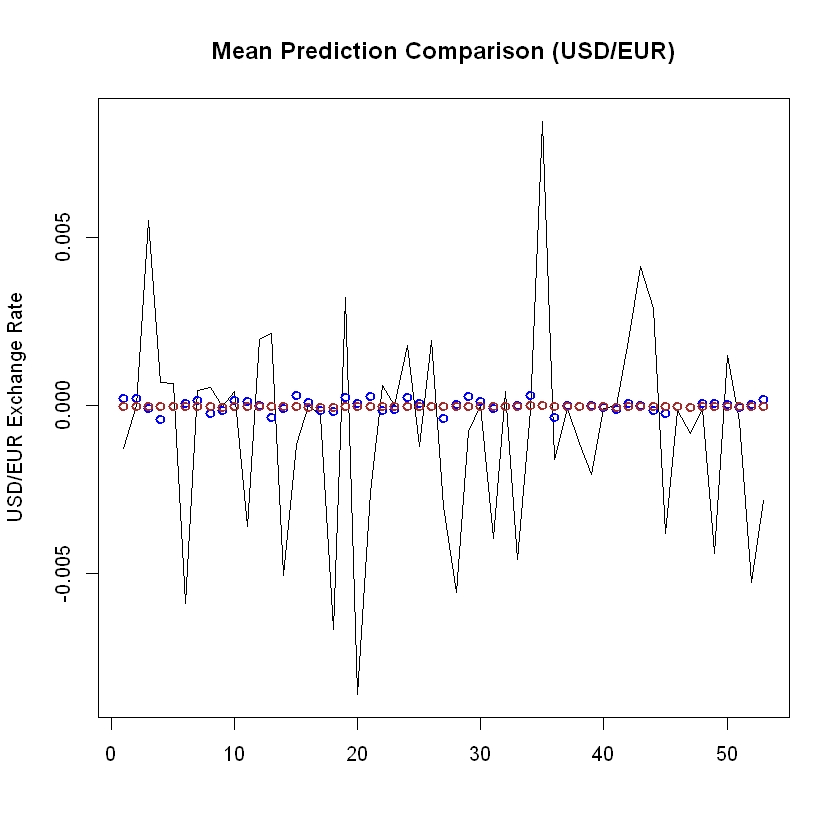

In [54]:
#Mean Prediction Comparison Plot
n=length(data)
ymin = min(c(as.vector(data.test),fore.series.1,fore.series.2))
ymax = max(c(as.vector(data.test),fore.series.1,fore.series.2))
data.plot = data.test
names(data.plot)="Fore"
data.plot$Fore=fore.series.1
plot(data.test,type="l", ylim=c(ymin,ymax), xlab=" ", 
ylab="USD/EUR Exchange Rate",main="Mean Prediction Comparison (USD/EUR)")


points(fore.series.1,lwd= 2, col="blue")

data.plot$Fore=fore.series.2
points(fore.series.2,lwd= 2, col="brown")


ERROR: Error in plot.window(...): need finite 'ylim' values


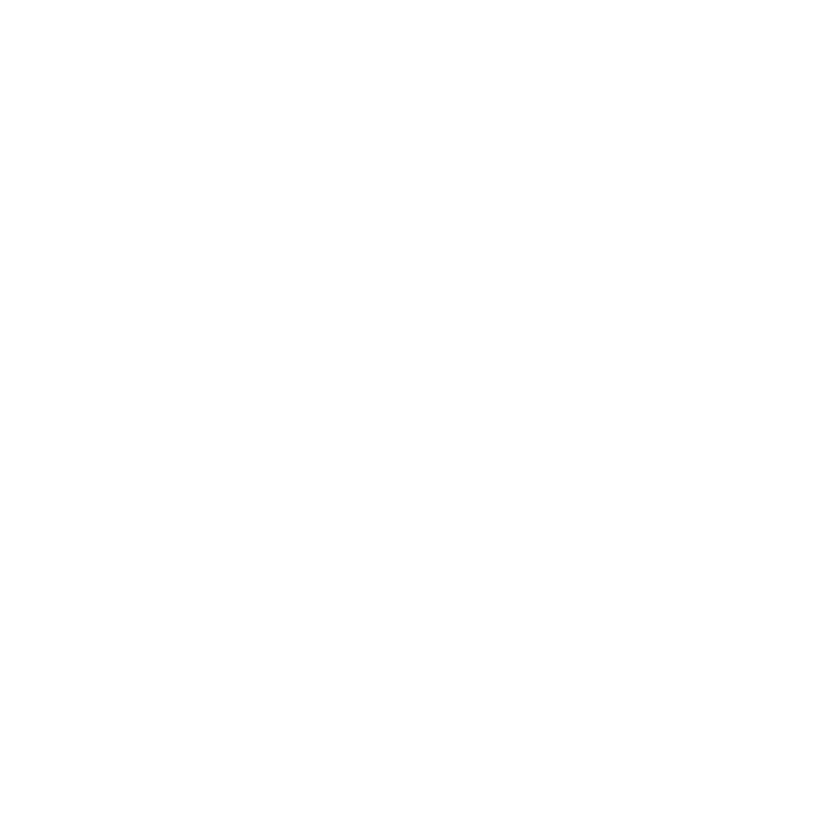

In [53]:
#Compare squared observed time series with variance forecasts
ymin = min(c(as.vector(data.test^2),fore.sigma.1^2,fore.sigma.2^2))
ymax = max(c(as.vector(data.test^2),fore.sigma.1^2,fore.sigma.2^2))
plot(data.test^2,type="l", ylim=c(ymin,ymax), xlab=" ", ylab="USD/EUR Exchange Rate",
main="Variance Prediction Comparison (USD/EUR)")
data.plot$Fore=fore.sigma.1^2
points(fore.sigma.1^2,lwd= 2, col="blue")
data.plot$Fore=fore.sigma.2^2
points(fore.sigma.2^2,lwd= 2, col="brown")


In [103]:
#Other models
library(data.table)
library(xts)
library(tseries)
library(rugarch)
install.packages("tsDyn")
library(tsDyn)

Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'deSolve', 'fracdiff', 'mnormt', 'tseriesChaos', 'forecast'



package 'deSolve' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'tseriesChaos' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked
package 'tsDyn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpiy4VQK\downloaded_packages


Warning message:
"package 'tsDyn' was built under R version 3.6.3"

In [107]:
#Divide data into training and testing
#Predict July and August
#data.test=diff.rate[6272:nrow(diff.rate),]
#data.train=diff.rate[-c(6272:nrow(diff.rate)),]

spec.1 = ugarchspec(variance.model=list(garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0), include.mean=T), distribution.model="std")    
spec.2 = ugarchspec(variance.model=list(model = "gjrGARCH",garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0), include.mean=T), distribution.model="std")
spec.3 = ugarchspec(variance.model=list(model = "eGARCH",garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0),include.mean=T), distribution.model="std")
spec.4 = ugarchspec(variance.model=list(model = "apARCH",garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0), include.mean=T), distribution.model="std")
spec.5 = ugarchspec(variance.model=list(model = "iGARCH",garchOrder=c(1,2)),
mean.model=list(armaOrder=c(0,0), include.mean=T), distribution.model="std")




In [ ]:
#Prediction of the return time series and the volatility sigma
nfore = length(data.test)
fore.series.1 = NULL; fore.sigma.1 = NULL
fore.series.2 = NULL; fore.sigma.2 = NULL
fore.series.3 = NULL; fore.sigma.3 = NULL
fore.series.4 = NULL; fore.sigma.4 = NULL
fore.series.5 = NULL; fore.sigma.5 = NULL
for(f in 1: nfore)
{
#Fit models
data = data.train
if(f>2)
data = c(data.train,data.test[1:(f-1)])  
final.model.1 = ugarchfit(spec.1, data, solver = 'hybrid')    
final.model.2 = ugarchfit(spec.2, data, solver = 'hybrid')
final.model.3 = ugarchfit(spec.3, data, solver = 'hybrid')
final.model.4 = ugarchfit(spec.4, data, solver = 'hybrid')
final.model.5 = ugarchfit(spec.5, data, solver = 'hybrid')
mod.6=setar(data, m=2, thDelay=1)
mod.7=aar(data, m=2)
mod.8=nnetTs(data, m=2, size=3, control=list(maxit=1e5))
#Forecast
fore = ugarchforecast(final.model.1, n.ahead=1)
fore.series.1 = c(fore.series.1, fore@forecast$seriesFor)
          fore.sigma.1 = c(fore.sigma.1, fore@forecast$sigmaFor)
fore = ugarchforecast(final.model.2, n.ahead=1)
fore.series.2 = c(fore.series.2, fore@forecast$seriesFor)
          fore.sigma.2 = c(fore.sigma.2, fore@forecast$sigmaFor)
fore = ugarchforecast(final.model.3, n.ahead=1)
fore.series.3 = c(fore.series.3, fore@forecast$seriesFor)
            fore.sigma.3 = c(fore.sigma.3, fore@forecast$sigmaFor)
fore = ugarchforecast(final.model.4, n.ahead=1)
fore.series.4 = c(fore.series.4, fore@forecast$seriesFor)
fore = ugarchforecast(final.model.5, n.ahead=1)
           fore.sigma.4 = c(fore.sigma.4, fore@forecast$sigmaFor)
fore.series.5 = c(fore.series.5, fore@forecast$seriesFor)
            fore.sigma.5 = c(fore.sigma.5, fore@forecast$sigmaFor)
}





In [ ]:
#Compare squared observed time series with variance forecasts
ymin = min(c(as.vector(data.test^2),fore.sigma.1^2,fore.sigma.2^2,fore.sigma.3^2, 
                    fore.sigma.4^2, fore.sigma.5^2))
ymax = max(c(as.vector(data.test^2),fore.sigma.1^2,fore.sigma.2^2,fore.sigma.3^2, 
                    fore.sigma.4^2, fore.sigma.5^2))
plot(data.test^2,type="l", ylim=c(ymin,ymax), xlab=" ", ylab="USD/EUR Exchange Rate",
main="Variance Prediction Comparison (USD/EUR)")
data.plot$Fore=fore.sigma.1^2
points(data.plot,lwd= 2, col="blue")
data.plot$Fore=fore.sigma.2^2
points(data.plot,lwd= 2, col="brown")
        data.plot$Fore=fore.sigma.3^2
points(data.plot,lwd= 2, col="purple")
        #data.plot$Fore=fore.sigma.4^2
#points(data.plot,lwd= 2, col="green")
        data.plot$Fore=fore.sigma.5^2
points(data.plot,lwd= 2, col="pink")